 Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/students.csv')

Show Top 11 Records

In [3]:
df.head(11)

,gender,race_ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score
0,male,group C,bachelor's degree,none,21,75,47
1,female,group A,high school,none,38,56,80
2,male,group C,master's degree,completed,90,74,17
3,female,group A,some high school,completed,16,97,68
4,female,group D,some high school,none,37,21,55
5,female,group B,associate's degree,completed,94,56,50
6,female,group D,master's degree,completed,38,46,41
7,male,group C,some college,completed,75,60,71
8,male,group A,some college,completed,89,93,62
9,female,group D,high school,completed,78,64,37


Preparing X and Y variables

In [4]:
X = df.drop(columns=['math_score'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,test_preparation_course,reading_score,writing_score
0,male,group C,bachelor's degree,none,75,47
1,female,group A,high school,none,56,80
2,male,group C,master's degree,completed,74,17
3,female,group A,some high school,completed,97,68
4,female,group D,some high school,none,21,55


In [5]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['male' 'female']
Categories in 'race_ethnicity' variable:   ['group C' 'group A' 'group D' 'group B']
Categories in'parental level of education' variable: ["bachelor's degree" 'high school' "master's degree" 'some high school'
 "associate's degree" 'some college']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [6]:
y = df['math_score']
y

0        21
1        38
2        90
3        16
4        37
         ..
99995    46
99996    36
99997    61
99998    79
99999    77
Name: math_score, Length: 100000, dtype: int64

this is a pipleline for transformation,wich we can always use for transformation
a pipeline because  it is one step after the other, one hot encoder will happen first before scarlar encodeing  will happen
 Create Column Transformer with 3 types of transformers

In [7]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [8]:
X = preprocessor.fit_transform(X)

In [9]:
X.shape

(100000, 16)

separate dataset into train and test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((80000, 16), (20000, 16))

Create an Evaluate Function to give all metrics after model Training

In [11]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [12]:
   models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
  
    
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model
   # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 26.2454
- Mean Absolute Error: 22.7163
- R2 Score: 0.0001
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 26.2001
- Mean Absolute Error: 22.6615
- R2 Score: -0.0004


Lasso
Model performance for Training set
- Root Mean Squared Error: 26.2468
- Mean Absolute Error: 22.7188
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 26.1977
- Mean Absolute Error: 22.6613
- R2 Score: -0.0002


Ridge
Model performance for Training set
- Root Mean Squared Error: 26.2450
- Mean Absolute Error: 22.7165
- R2 Score: 0.0001
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 26.2006
- Mean Absolute Error: 22.6622
- R2 Score: -0.0004


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 23.4639
- Mean Absolute Error: 19.6871
- R2 Score: 0.2008
------

Results

In [13]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Lasso,-0.000189
0,Linear Regression,-0.000377
2,Ridge,-0.000414
5,Random Forest Regressor,-0.147299
3,K-Neighbors Regressor,-0.214455
4,Decision Tree,-1.065464


Linear Regression

In [14]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is -0.04


Plot y_pred and y_test

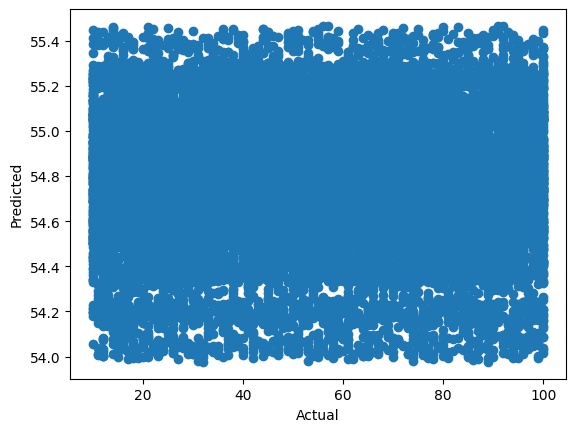

In [15]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

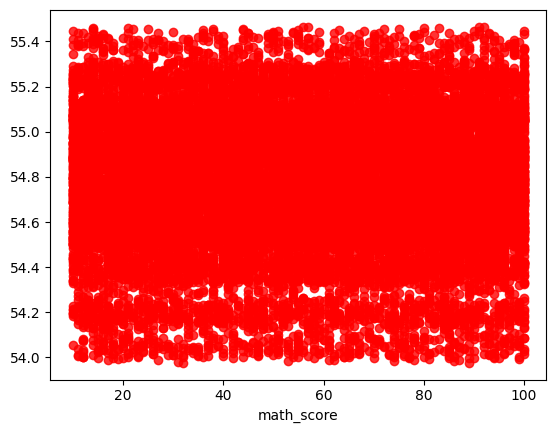

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Difference between Actual and Predicted Values

In [17]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
75721,24,54.691406,-30.691406
80184,39,54.955078,-15.955078
19864,44,54.720703,-10.720703
76699,51,54.525391,-3.525391
92991,39,54.779297,-15.779297
...,...,...,...
32595,81,54.927734,26.072266
29313,97,55.000000,42.000000
37862,61,55.119141,5.880859
53421,27,54.349609,-27.349609
